In [21]:
#import the libaries 
import tweepy
from textblob import TextBlob
from wordcloud import wordcloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [22]:
consumerKey = 'qjO6aJwA258lMTWmCZSDIi6vW'
consumerSecret = 'OFtKBpUZLKnSD0e6HbvdMFVrjIxO0jIdbwbSD0zKdwC44xvEyW'
accessToken = '799747129250107392-grMj8XeQzBcbUqcevCiU1WfpdvpdqvW'
accessTokenSecret = 'lKpSXDHQQjXyyRln7pxKo47KUzZY0WOgCewoX2ZDzxZsm'


In [23]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)
authenticate.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(authenticate, wait_on_rate_limit=True)


In [24]:
#gather 100 tweets about Harry kane and filter out any RT
search_term = '#harrykane -filter:retweets'
#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since= '2018-11-01', tweet_mode='extended').items(2000)
#store tweets to get in a variable to get full text
all_tweets = [tweet.full_text for tweet in tweets] 

In [25]:
df = pd.DataFrame(all_tweets, columns=['Tweets'])
df.head(5)

,Tweets
0,"Hey @RCBTweets, you've a fan in @HKane 😋\n\n#h..."
1,"#MiddaySports |\n\n#IPL2022: My team is RCB, b..."
2,England football captain Harry Kane too is a b...
3,Watching #MOTD. Few take aways:\n- #WatfordFC ...
4,Harry Kane off to watch some greyhound racing ...


In [26]:
#clean tweets
def cleanTwt(twt):
  twt = re.sub('#harrykane', 'harrykane', twt) #removes the # from rashford
  twt = re.sub('#HarryKane', 'HarryKane', twt) #removes the # from Rashford
  twt = re.sub('#[A-Za-z0-9]+', '',  twt) #removes any string with a #
  twt = re.sub('\\n', '', twt) #removes the backslash n 
  twt = re.sub('https?:\/\/\S+','', twt) #removes any hyperlink
  return twt

In [27]:
#Clean the tweets
df['Cleaned_Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head(10)

,Tweets,Cleaned_Tweets
0,"Hey @RCBTweets, you've a fan in @HKane 😋\n\n#h...","Hey @RCBTweets, you've a fan in @HKane 😋harryk..."
1,"#MiddaySports |\n\n#IPL2022: My team is RCB, b...","|: My team is RCB, been lucky enough to meet ..."
2,England football captain Harry Kane too is a b...,England football captain Harry Kane too is a b...
3,Watching #MOTD. Few take aways:\n- #WatfordFC ...,Watching . Few take aways:- are REALLY bad- H...
4,Harry Kane off to watch some greyhound racing ...,Harry Kane off to watch some greyhound racing ...
5,"I am done with protecting Conte, literally his...","I am done with protecting Conte, literally his..."
6,Mr @imVkohli learn something from #HarryKane. ...,Mr @imVkohli learn something from HarryKane. H...
7,FULL-TIME! Brentford 0-0 Tottenham ⚪\n\n#MICRO...,FULL-TIME! Brentford 0-0 Tottenham ⚪ harr...
8,Intense game so far! 0 : 0!\nOur #MachineLearn...,Intense game so far! 0 : 0!Our model gives To...
9,0 : 0 after the first half!\nOur #MachineLearn...,0 : 0 after the first half!Our model gives To...


In [28]:
import textblob
#create function to get subjectivity 
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity 
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create 2 new columns 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

#show the data
df.head(10)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity
0,"Hey @RCBTweets, you've a fan in @HKane 😋\n\n#h...","Hey @RCBTweets, you've a fan in @HKane 😋harryk...",0.000000,0.000000
1,"#MiddaySports |\n\n#IPL2022: My team is RCB, b...","|: My team is RCB, been lucky enough to meet ...",0.666667,0.166667
2,England football captain Harry Kane too is a b...,England football captain Harry Kane too is a b...,0.100000,0.000000
3,Watching #MOTD. Few take aways:\n- #WatfordFC ...,Watching . Few take aways:- are REALLY bad- H...,0.641667,-0.575000
4,Harry Kane off to watch some greyhound racing ...,Harry Kane off to watch some greyhound racing ...,0.000000,0.000000
5,"I am done with protecting Conte, literally his...","I am done with protecting Conte, literally his...",0.522222,-0.191667
6,Mr @imVkohli learn something from #HarryKane. ...,Mr @imVkohli learn something from HarryKane. H...,0.357143,0.112500
7,FULL-TIME! Brentford 0-0 Tottenham ⚪\n\n#MICRO...,FULL-TIME! Brentford 0-0 Tottenham ⚪ harr...,0.000000,0.000000
8,Intense game so far! 0 : 0!\nOur #MachineLearn...,Intense game so far! 0 : 0!Our model gives To...,0.700000,0.231250
9,0 : 0 after the first half!\nOur #MachineLearn...,0 : 0 after the first half!Our model gives To...,0.366667,0.625000


In [29]:
#function to compute the negative, neutral and positive analysis 

def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [30]:
#create a column to get the text sentiment 
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#show the data
df.head(100)

,Tweets,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,"Hey @RCBTweets, you've a fan in @HKane 😋\n\n#h...","Hey @RCBTweets, you've a fan in @HKane 😋harryk...",0.000000,0.000000,Neutral
1,"#MiddaySports |\n\n#IPL2022: My team is RCB, b...","|: My team is RCB, been lucky enough to meet ...",0.666667,0.166667,Positive
2,England football captain Harry Kane too is a b...,England football captain Harry Kane too is a b...,0.100000,0.000000,Neutral
3,Watching #MOTD. Few take aways:\n- #WatfordFC ...,Watching . Few take aways:- are REALLY bad- H...,0.641667,-0.575000,Negative
4,Harry Kane off to watch some greyhound racing ...,Harry Kane off to watch some greyhound racing ...,0.000000,0.000000,Neutral
...,...,...,...,...,...
72,#PepGuardiola was right!\n#Merson was right!\n...,was right! was right!It's not easy to hear it...,0.634921,0.214782,Positive
73,"MAGIC IN THE VIP @SpursOfficial 💫 CRYSTALS, Al...","MAGIC IN THE VIP @SpursOfficial 💫 CRYSTALS, Al...",1.000000,0.500000,Positive
74,@Arsenal Ahahahaha arsenal bottled again #coys...,@Arsenal Ahahahaha arsenal bottled again,0.000000,0.000000,Neutral
75,"Ronaldo shows up in must win games, our main m...","Ronaldo shows up in must win games, our main m...",0.377778,0.155556,Positive


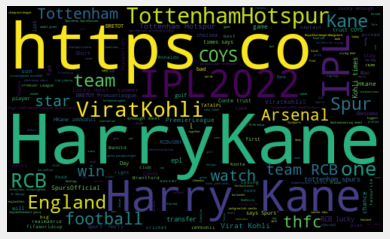

In [31]:
from pandas.core.common import random_state
#Word Cloud
allwords = ' '.join(twts for twts in df['Tweets'])
wordCloud = wordcloud.WordCloud(width = 500, height=300, random_state = 21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()


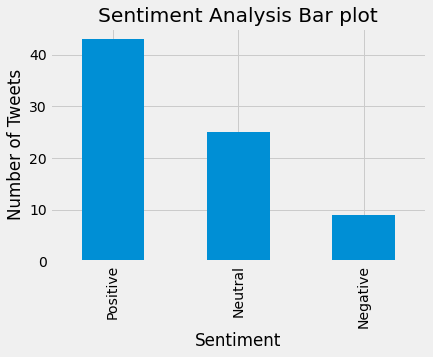

In [32]:
#barchart to show the count of positive, neutral and negative sentiment 
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [33]:
df.shape[0]

77